### Initial Imports & Dependencies

In [47]:
# Importing Libraries & Dependencies
import pandas as pd
import numpy as np
import csv
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Import SK-LEARN libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

---

## Load Datasets

In [50]:

# To import the X_train_smote, X_train_ros, X_train_scaled, X_test_scaled
X_train_smote = np.loadtxt('resources/X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt('resources/X_train_ros.csv', delimiter=',')
X_train_scaled = np.loadtxt('resources/X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt('resources/X_test_scaled.csv', delimiter=',')

# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv('resources/y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv('resources/y_train_ros.csv', sep=',', header=0, squeeze=True)

# To import y_train, y_test
y_train = pd.read_csv('resources/y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv('resources/y_test.csv', sep=',', header=0, squeeze=True, index_col=0)


---

## Simple Logistical Regression

The first part of the Logistical Regression notebook uses the scaled training and testing data to develop a predictive model.

#### To evaluate the model the following metrics will be applied:

1. Balanced Accuracy & Accuracy Score
2. Confusion Matrix
3. Classification Report
4. Mean-Squared-Error & Root Mean-Squared-Error
5. ROC-AUC

In [51]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model

LogisticRegression(random_state=1)

#### Fit (train) the scaled dataset to the model

In [52]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

#### Score the model using the test data

In [53]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9530666666666666
Testing Data Score: 0.9472


#### Make Predictions

In [54]:
y_pred = model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### 1. Balanced Accuracy Score & Accuracy Score

In [55]:
# Evaluate the predict model through the Balanced Accuracy Score metric
balanced_accuracy_score(y_test, y_pred)

0.7920353982300885

In [56]:
# Evaluate the predict model through the Accuracy Score metric
accuracy_score(y_test, y_pred)

0.9472

#### 2. Confusion Matrix

In [57]:
confusion_matrix(y_test, y_pred)

array([[1112,   18],
       [  48,   72]], dtype=int64)

#### 3. Classification Report

In [58]:
# Classification report title print statement 
print("Classification Report:")

# Create the classification report
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1130
           1       0.80      0.60      0.69       120

    accuracy                           0.95      1250
   macro avg       0.88      0.79      0.83      1250
weighted avg       0.94      0.95      0.94      1250



#### 4. Mean-Squared-Error & Root Mean-Squared-Error

In [59]:
# Calculate the models mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.052800


In [60]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.229783


#### 5. ROC-AUC

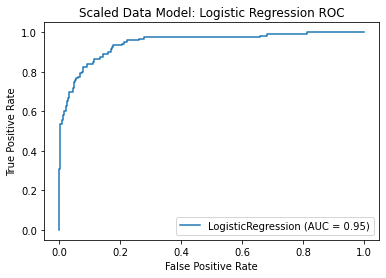

Scaled Data Model: ROC-AUC Score: 0.7920353982300885


In [61]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)

# Set plot labels
plt.title("Scaled Data Model: Logistic Regression ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("Scaled Data Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))

---

## Logistical Regression Model + SMOTE

The second part of the Logistical Regression notebook uses the SMOTE training and testing data to develop a predictive model.

#### To evaluate the model the following metrics will be applied:

1. Balanced Accuracy & Accuracy Score
2. Confusion Matrix
3. Classification Report
4. Mean-Squared-Error & Root Mean-Squared-Error
5. ROC-AUC

#### Fit (train) or model using the training data

In [62]:
model.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=1)

#### Make Predictions

In [63]:
y_pred = model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


#### 1. Balanced Accuracy Score & Accuracy Score

In [64]:
# Evaluate the predict model through the Balanced Accuracy Score metric
balanced_accuracy_score(y_test, y_pred)

0.8632005899705015

In [65]:
# Evaluate the predict model through the Accuracy Score metric
accuracy_score(y_test, y_pred)

0.9008

#### 2. Confusion Matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[1028,  102],
       [  22,   98]], dtype=int64)

#### 3. Classification Report

In [19]:
# Classification report title print statement 
print("Classification Report:")

# Create the classification report
print(classification_report(y_test, y_pred))

# print(classification_report_imbalanced(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1130
           1       0.49      0.82      0.61       120

    accuracy                           0.90      1250
   macro avg       0.73      0.86      0.78      1250
weighted avg       0.93      0.90      0.91      1250



#### 4. Mean-Squared-Error & Root Mean-Squared-Error

In [20]:
# Calculate the models mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.099200


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.314960


#### 5. ROC-AUC

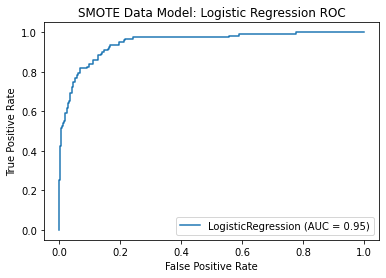

SMOTE Data Model: ROC-AUC Score: 0.8632005899705015


In [22]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)

# Set plot labels
plt.title("SMOTE Data Model: Logistic Regression ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("SMOTE Data Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))

---

## Logistical Regression Model + Random Oversampling (ROS)

The third part of the Logistical Regression notebook uses the ROS training and testing data to develop a predictive model.

#### To evaluate the model the following metrics will be applied:

1. Balanced Accuracy & Accuracy Score
2. Confusion Matrix
3. Classification Report
4. Mean-Squared-Error & Root Mean-Squared-Error
5. ROC-AUC

#### Fit (train) or model using the training data

In [29]:
model.fit(X_train_ros, y_train_ros)

LogisticRegression(random_state=1)

#### Make Predictions

In [30]:
ros_y_pred = model.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": ros_y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


#### 1. Balanced Accuracy Score & Accuracy Score

In [42]:
# Evaluate the predict model through the Balanced Accuracy Score metric
# from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.8712758112094395

In [43]:
# Evaluate the predict model through the Accuracy Score metric
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8952

#### 2. Confusion Matrix

In [71]:
confusion_matrix(y_test, y_pred)

array([[1018,  112],
       [  19,  101]], dtype=int64)

#### 3. Classification Report

In [72]:
# Classification report title print statement 
print("Classification Report:")

# Create the classification report
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1130
           1       0.47      0.84      0.61       120

    accuracy                           0.90      1250
   macro avg       0.73      0.87      0.77      1250
weighted avg       0.93      0.90      0.91      1250



#### 4. Mean-Squared-Error & Root Mean-Squared-Error

In [73]:
# Calculate the models mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.104800


In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.323728


#### 5. ROC-AUC

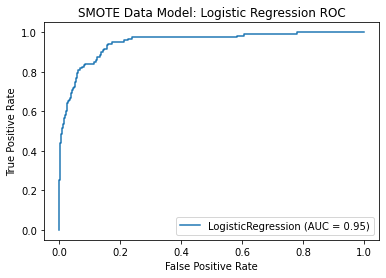

SMOTE Data Model: ROC-AUC Score: 0.8712758112094396


In [75]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)

# Set plot labels
plt.title("SMOTE Data Model: Logistic Regression ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("SMOTE Data Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))